# Autorki:

*   Ida Darmochwał; 72134
*   Kamila Warchoł; 71499
*   Maja Brodowska; 74401
*   Varia Baradachova; 73775

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, accuracy_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/Shareddrives/Wprowadzenie do AI - projekt/train.csv')
df_test = pd.read_csv('/content/drive/Shareddrives/Wprowadzenie do AI - projekt/test.csv')

### EDA

In [ ]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df_train.describe().T # wyświetlanie podstawowych statystyk opisowych z transpozycją

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [ ]:
cat_columns = df_train.select_dtypes(object).columns.to_list()
num_columns = df_train.select_dtypes(np.number).columns.to_list()

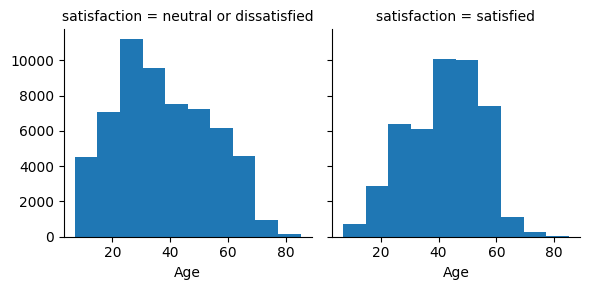

In [ ]:
g = sns.FacetGrid(df_train, col='satisfaction')
g.map(plt.hist, 'Age', bins=10)

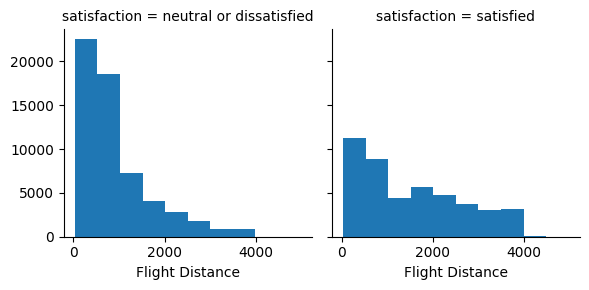

In [ ]:
g = sns.FacetGrid(df_train, col='satisfaction')
g.map(plt.hist, 'Flight Distance', bins=10)

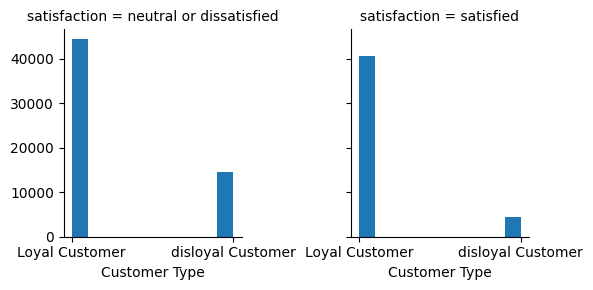

In [ ]:
g = sns.FacetGrid(df_train, col='satisfaction')
g.map(plt.hist, 'Customer Type', bins=10)

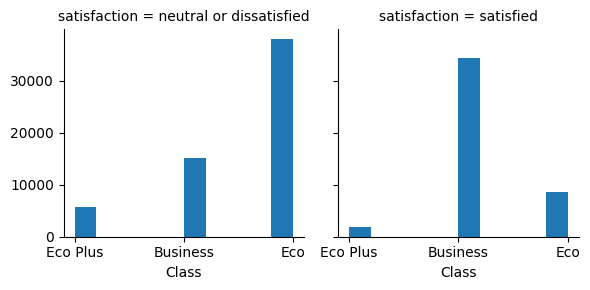

In [ ]:
g = sns.FacetGrid(df_train, col='satisfaction')
g.map(plt.hist, 'Class', bins=10)

<Axes: xlabel='Gender', ylabel='count'>

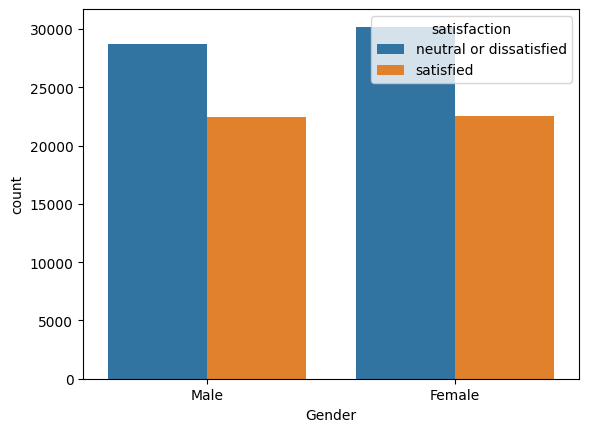

In [ ]:
sns.countplot(df_train,x='Gender',hue='satisfaction')

<Axes: xlabel='Type of Travel', ylabel='count'>

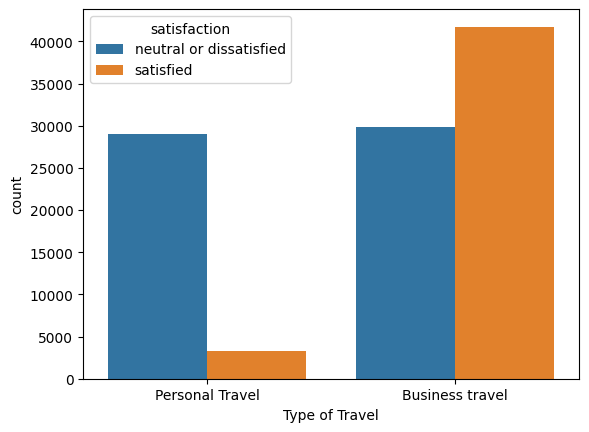

In [ ]:
sns.countplot(df_train, x='Type of Travel', hue='satisfaction')

### Zakodowanie kolumny "satisfaction"

In [ ]:
df_train['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [ ]:
encoded_satisfaction = df_train['satisfaction'].astype('category')
df_train['satisfaction'] = encoded_satisfaction.cat.codes
print("Kody:", encoded_satisfaction.cat.categories)

Kody: Index(['neutral or dissatisfied', 'satisfied'], dtype='object')


In [ ]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Wybranie X i y

In [ ]:
y = df_train["satisfaction"].copy()
X = df_train.drop(["satisfaction", "Unnamed: 0", "id"], axis=1).copy()

In [ ]:
### TEST DATASET

X_df_test = df_test.drop(["satisfaction", "Unnamed: 0", "id"], axis=1).copy()

### Wypełnienie brakujących danych

In [ ]:
df_train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
missing = ['Arrival Delay in Minutes']

# Fit and transform numerical columns
for col in missing:
    # Instantiate SimpleImputer for numerical columns
    imputer_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
    X[[col]] = imputer_mean.fit_transform(X[[col]])

In [ ]:
### TEST DATASET

missing = ['Arrival Delay in Minutes']

# Fit and transform numerical columns
for col in missing:
    # Instantiate SimpleImputer for numerical columns
    imputer_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
    X_df_test[[col]] = imputer_mean.fit_transform(X_df_test[[col]])

### Encoding

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
# zakodowanie zmiennej na format binarny
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[["Gender"]])
transformed_sleep = enc.transform(X[["Gender"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
gender_df = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Gender"]))
gender_df

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
103899,1.0,0.0
103900,0.0,1.0
103901,0.0,1.0
103902,1.0,0.0


In [ ]:
### TEST DATASET

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_df_test[["Gender"]])
transformed_sleep = enc.transform(X_df_test[["Gender"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
gender_df_test = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Gender"]))
gender_df_test

,Gender_Female,Gender_Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
25971,0.0,1.0
25972,0.0,1.0
25973,1.0,0.0
25974,0.0,1.0


In [ ]:
# zakodowanie zmiennej na format binarny
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[["Customer Type"]])
transformed_sleep = enc.transform(X[["Customer Type"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
customer_df = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Customer Type"]))
customer_df

,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
103899,0.0,1.0
103900,1.0,0.0
103901,0.0,1.0
103902,0.0,1.0


In [ ]:
### TEST DATASET

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_df_test[["Customer Type"]])
transformed_sleep = enc.transform(X_df_test[["Customer Type"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
customer_df_test = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Customer Type"]))
customer_df_test

,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
25971,0.0,1.0
25972,1.0,0.0
25973,1.0,0.0
25974,1.0,0.0


In [ ]:
# zakodowanie zmiennej na format binarny
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[["Type of Travel"]])
transformed_sleep = enc.transform(X[["Type of Travel"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
type_travel_df = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Type of Travel"]))
type_travel_df

,Type of Travel_Business travel,Type of Travel_Personal Travel
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
103899,1.0,0.0
103900,1.0,0.0
103901,1.0,0.0
103902,1.0,0.0


In [ ]:
### TEST DATASET

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_df_test[["Type of Travel"]])
transformed_sleep = enc.transform(X_df_test[["Type of Travel"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
type_travel_df_test = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Type of Travel"]))
type_travel_df_test

,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
25971,1.0,0.0
25972,1.0,0.0
25973,0.0,1.0
25974,1.0,0.0


In [ ]:
# zakodowanie zmiennej na format binarny
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[["Class"]])
transformed_sleep = enc.transform(X[["Class"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
class_df = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Class"]))
class_df

,Class_Business,Class_Eco,Class_Eco Plus
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
103899,0.0,1.0,0.0
103900,1.0,0.0,0.0
103901,1.0,0.0,0.0
103902,0.0,1.0,0.0


In [ ]:
### TEST DATASET

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_df_test[["Class"]])
transformed_sleep = enc.transform(X_df_test[["Class"]]).toarray()

# tworzenie Data Frame z zakodowaną zmienną
class_df_test = pd.DataFrame(transformed_sleep, columns=enc.get_feature_names_out(["Class"]))
class_df_test

,Class_Business,Class_Eco,Class_Eco Plus
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
25971,1.0,0.0,0.0
25972,1.0,0.0,0.0
25973,0.0,1.0,0.0
25974,1.0,0.0,0.0


In [ ]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
# Lista kolumn do przeskalowania
columns_to_scale = [
    "Age",
    "Flight Distance",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Inflight service",
    "Cleanliness",
    "Checkin service"
]

for column in columns_to_scale:
    scaler = MinMaxScaler()
    X[column] = scaler.fit_transform(X[[column]])

In [ ]:
### TEST DATASET

columns_to_scale = [
    "Age",
    "Flight Distance",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Inflight service",
    "Cleanliness",
    "Checkin service"
]

for column in columns_to_scale:
    scaler = MinMaxScaler()
    X_df_test[column] = scaler.fit_transform(X_df_test[[column]])

### Połączenie danych

In [ ]:
X_transformed = X.copy()
X_transformed = X_transformed.drop(["Gender","Class", "Type of Travel", "Customer Type"],axis=1) # usuwanie niepotrzebnych kolumn po encodingu
X_transformed = pd.concat([X_transformed, class_df, type_travel_df, customer_df, gender_df], axis=1)
X_transformed.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Female,Gender_Male
0,0.076923,0.086632,0.6,0.8,3,1,5,3,5,1.0,...,18.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.230769,0.041195,0.6,0.4,3,3,1,3,1,0.2,...,6.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.243590,0.224354,0.4,0.4,2,2,5,5,5,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.230769,0.107229,0.4,1.0,5,5,2,2,2,0.4,...,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.692308,0.036955,0.6,0.6,3,3,4,5,5,0.6,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
### TEST DATASET

X_df_test_transformed = X.copy()
X_df_test_transformed = X_df_test_transformed.drop(["Gender","Class", "Type of Travel", "Customer Type"],axis=1)
X_df_test_transformed = pd.concat([X_df_test_transformed, class_df_test, type_travel_df_test, customer_df_test, gender_df_test], axis=1)
X_df_test_transformed.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Gender_Female,Gender_Male
0,0.076923,0.086632,0.6,0.8,3,1,5,3,5,1.0,...,18.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.230769,0.041195,0.6,0.4,3,3,1,3,1,0.2,...,6.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.243590,0.224354,0.4,0.4,2,2,5,5,5,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,5,5,2,2,2,0.4,...,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.692308,0.036955,0.6,0.6,3,3,4,5,5,0.6,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### TRAIN/TEST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)
svc = SVC(random_state=0).fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
lr = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train) # increased max iterations limit as otherwise there is an error of exceeded iterations limit

y_pred_rfc = rfc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_lr_prob = lr.predict_proba(X_test)

In [ ]:
### TEST DATASET

y_pred_rfc_df_test = rfc.predict(X_df_test_transformed)
y_pred_svc_df_test = svc.predict(X_df_test_transformed)
y_pred_gnb_df_test = gnb.predict(X_df_test_transformed)
y_pred_knn_df_test = knn.predict(X_df_test_transformed)
y_pred_lr_df_test = lr.predict(X_df_test_transformed)
y_pred_prop_lr_df_test = lr.predict_proba(X_df_test_transformed)

print("y_pred_prop_lr_df_test[0], y_pred_lr_df_test[0]", y_pred_prop_lr_df_test[0], y_pred_lr_df_test[0])

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print("RandomForestClassifier")
print("Recall score: ", recall_score(y_test, y_pred_rfc))
print("Precision score: ", precision_score(y_test, y_pred_rfc))
print("F1 score: ", f1_score(y_test, y_pred_rfc))
print("\n")

print("SVC")
print("Recall score: ", recall_score(y_test, y_pred_svc))
print("Precision score: ", precision_score(y_test, y_pred_svc))
print("F1 score: ", f1_score(y_test, y_pred_svc))
print("\n")

print("GaussianNB")
print("Recall score: ", recall_score(y_test, y_pred_gnb))
print("Precision score: ", precision_score(y_test, y_pred_gnb))
print("F1 score: ", f1_score(y_test, y_pred_gnb))
print("\n")

print("KNeighborsClassifier")
print("Recall score: ", recall_score(y_test, y_pred_knn))
print("Precision score: ", precision_score(y_test, y_pred_knn))
print("F1 score: ", f1_score(y_test,y_pred_knn))
print("\n")

print("LogisticRegression")
print("Recall score: ", recall_score(y_test, y_pred_lr))
print("Precision score: ", precision_score(y_test, y_pred_lr))
print("F1 score: ", f1_score(y_test, y_pred_lr))
print("\n")

In [ ]:
y_pred_lr_prob[0], y_pred_lr[0]

In [ ]:
lr.score(X_test, y_test)

In [ ]:
lr.coef_[0]

### Metryki

In [ ]:
confusion_matrix(y_test, y_pred_lr)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr), display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
print("Recall score: ", recall_score(y_test, y_pred_lr))
print("Precision score: ", precision_score(y_test, y_pred_lr))
print("F1 score: ", f1_score(y_test, y_pred_lr))

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.show()

### KFold cross walidacja && Grid Search

In [ ]:
scores = cross_val_score(lr, X_train, y_train, cv=10)
scores

In [ ]:
models = [rfc, svc, gnb, knn, lr]

In [ ]:
for i in models:
  scores = cross_val_score(i, X_train, y_train, cv=10)
  print(i, ": with mean ", scores.mean(), " and std ", scores.std())

In [ ]:
grid = {
    'max_depth': [5, 8, 10],
    'max_features': ['sqrt', 'log2', None, 5],
    'n_estimators': [100, 200, 500]
}
rfc_grid = RandomForestClassifier()
rfc_grid_cv = GridSearchCV(rfc_grid, grid, cv=10)
rfc_grid_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", rfc_grid_cv.best_params_)
print("accuracy :", rfc_grid_cv.best_score_)

In [ ]:
grid = {
    'C': [0.1, 1, 5, 10],
    'degree': [3, 5, 10],
    'class_weight': [ 'balanced', None ]
}

svc_grid = SVC()
svc_grid_cv = GridSearchCV(svc_grid, grid, cv=10)
svc_grid_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", svc_grid_cv.best_params_)
print("accuracy :", svc_grid_cv.best_score_)

In [ ]:
grid = {
    'n_neighbors': [5, 8, 10],
    'weights': ['uniform', 'distance', None],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}
knn_grid = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn_grid, grid, cv=10)
knn_grid_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", knn_grid_cv.best_params_)
print("accuracy :", knn_grid_cv.best_score_)

### TRAIN/TEST po grid searchu z najlepszymi parametrami

In [ ]:
rfc_1 = RandomForestClassifier(random_state=0, max_depth=5, max_features='log2', n_estimators=500).fit(X_train, y_train)
svc_1 = SVC(random_state=0, C= 5, class_weight=None, degree= 3).fit(X_train, y_train)
gnb_1 = GaussianNB().fit(X_train, y_train)
knn_1 = KNeighborsClassifier(algorithm='auto', n_neighbors=10, p=2, weights='uniform').fit(X_train, y_train)
lr_1 = LogisticRegression(random_state=0, C=5, class_weight='balanced', penalty='l2').fit(X_train, y_train).fit(X_train, y_train)

y_pred_rfc_1 = rfc_1.predict(X_test)
y_pred_svc_1 = svc_1.predict(X_test)
y_pred_gnb_1 = gnb_1.predict(X_test)
y_pred_knn_1 = knn_1.predict(X_test)
y_pred_lr_1 = lr_1.predict(X_test)

y_pred_rfc_1_df_test = rfc_1.predict(X_df_test_transformed)
y_pred_svc_1_df_test = svc_1.predict(X_df_test_transformed)
y_pred_gnb_1_df_test = gnb_1.predict(X_df_test_transformed)
y_pred_knn_1_df_test = knn_1.predict(X_df_test_transformed)
y_pred_lr_1_df_test = lr_1.predict(X_df_test_transformed)

models_1 = [rfc_1, svc_1, gnb_1, knn_1, lr_1]


In [ ]:
for i in models_1:
  scores_1 = cross_val_score(i, X_train, y_train, cv=10)
  print(i, ": with mean ", scores_1.mean(), " and std ", scores_1.std())

In [ ]:
print("RandomForestClassifier")
print("Recall score: ", recall_score(y_test, y_pred_rfc_1))
print("Precision score: ", precision_score(y_test, y_pred_rfc_1))
print("F1 score: ", f1_score(y_test, y_pred_rfc_1))
print("\n")

print("SVC")
print("Recall score: ", recall_score(y_test, y_pred_svc_1))
print("Precision score: ", precision_score(y_test, y_pred_svc_1))
print("F1 score: ", f1_score(y_test, y_pred_svc_1))
print("\n")

print("GaussianNB")
print("Recall score: ", recall_score(y_test, y_pred_gnb_1))
print("Precision score: ", precision_score(y_test, y_pred_gnb_1))
print("F1 score: ", f1_score(y_test, y_pred_gnb_1))
print("\n")

print("KNeighborsClassifier")
print("Recall score: ", recall_score(y_test, y_pred_knn_1))
print("Precision score: ", precision_score(y_test, y_pred_knn_1))
print("F1 score: ", f1_score(y_test,y_pred_knn_1))
print("\n")

print("LogisticRegression")
print("Recall score: ", recall_score(y_test, y_pred_lr_1))
print("Precision score: ", precision_score(y_test, y_pred_lr_1))
print("F1 score: ", f1_score(y_test, y_pred_lr_1))